3. Attractive and Repulsive Potential Fields



This code creates a potential field combining attractive and repulsive forces.

<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Matplotlib currently does not support Telugu natively.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3103 (\N{TELUGU LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3093 (\N{TELUGU LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3134 (\N{TELUGU VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarning: Glyph 3122 (\N{TELUGU LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dc8abd961dfb>:75: UserWarnin

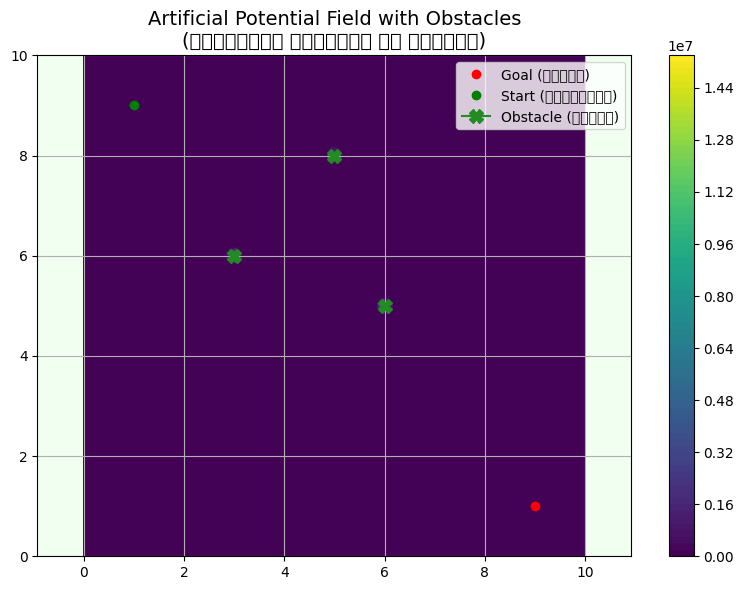

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D grid space
# 2D గ్రిడ్ స్పేస్ సృష్టించండి
x_vals = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Define start and goal points
# ప్రారంభ మరియు గమ్య స్థానాలు
start_point = np.array([1, 9])    # Start point (ప్రారంభం)
goal_point = np.array([9, 1])     # Goal point (గమ్యం)

# Define static obstacles
# స్థిరమైన ఆటంకాల స్థానాలు
obstacle_positions = [np.array([3, 6]), np.array([6, 5]), np.array([5, 8])]

# Potential field parameters
# పట ఫీల్డ్ పరామితులు
k_att = 2.0              # Attractive field strength (ఆకర్షణ బలం)
k_rep = 100              # Repulsive field strength (వికర్షణ బలం)
influence_radius = 1.5   # Influence radius of repulsion (ప్రభావ పరిధి)

# Attractive potential field toward the goal
# గమ్య బిందువు వైపు ఆకర్షణ పట ఫీల్డ్
U_attract = k_att * ((X - goal_point[0])**2 + (Y - goal_point[1])**2)

# Initialize repulsive potential
# వికర్షణ పట ఫీల్డ్ ప్రారంభించు
U_repulse = np.zeros_like(X)

# Compute repulsive field from each obstacle
# ప్రతి ఆటంకం నుండి వికర్షణ పట ఫీల్డ్ లెక్కించు
for obs in obstacle_positions:
    dx = X - obs[0]
    dy = Y - obs[1]
    dist_squared = dx**2 + dy**2
    within_influence = dist_squared < influence_radius**2
    with np.errstate(divide='ignore'):
        rep_value = k_rep * (1.0 / dist_squared - 1.0 / influence_radius**2)**2
        U_repulse += np.where(within_influence, rep_value, 0)

# Total potential = Attractive + Repulsive
# మొత్తం పట ఫీల్డ్ = ఆకర్షణ + వికర్షణ
U_total = U_attract + U_repulse

# Begin plotting with green background
# ఆకుపచ్చ నేపథ్యంతో ప్లాట్ ప్రారంభించు
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('honeydew')  # Light green background

# Draw contour of the total potential field
# మొత్తం పట ఫీల్డ్ యొక్క కాంటూర్ చిత్రీకరణ
contour = ax.contourf(X, Y, U_total, levels=80, cmap='viridis')  # 'viridis' for non-blue color map
plt.colorbar(contour, ax=ax)  # Add color scale

# Plot start and goal
# ప్రారంభం మరియు గమ్య బిందువులను చూపించు
ax.plot(goal_point[0], goal_point[1], 'ro', label='Goal (గమ్యం)')
ax.plot(start_point[0], start_point[1], 'go', label='Start (ప్రారంభం)')

# Plot obstacles with green markers instead of blue
# ఆటంకాలను ఆకుపచ్చ రంగుతో చూపించు
for i, obs in enumerate(obstacle_positions):
    ax.plot(obs[0], obs[1], marker='X', markersize=10, color='forestgreen',  # Green color for obstacles
            label='Obstacle (ఆటంకం)' if i == 0 else None)

# Final settings
# చివరి సెట్టింగులు
ax.set_title("Artificial Potential Field with Obstacles\n(ఆటంకాలతో కృత్రిమ పట ఫీల్డ్)", fontsize=14)
ax.axis('equal')     # Equal axis scaling
ax.grid(True)        # Show grid
ax.legend(loc='upper right')  # Legend location
plt.tight_layout()
plt.show()
